Puzzle: March 2023
Link: https://www.janestreet.com/puzzles/robot-long-jump-index/

Problem: Assume both robots are programmed to optimize their probability of winning and are aware of each other’s strategies. You are just sitting down to watch a match’s very first attempt (of the first round, which may or may not end up being discarded). What is the probability that this attempt scores 0? Give this probability as a decimal rounded to 9 digits past the decimal point.

Eq(p(x, y), ((1 - x)*(1 - y)*exp(x)*exp(y)*Integral((-Max(x, u - 1) + Min(1, u))*Integral((-Max(y, v - 1) + Min(1, v))/(1 - y), (v, y, u))/(1 - x), (u, Max(x, y), 2)) + (1 - x)*(-(1 - y)*exp(y) + 1)*exp(x))/(-(-(1 - x)*exp(x) + 1)*(-(1 - y)*exp(y) + 1) + 1))

Eq(p(x, y), Piecewise(((x - 1)*((-x**3 + x**2 + 4*x + 2*y**3 - y**2*(3*x - 3) + 2*y*(x - 1)**2 - 6)*exp(y) + 12)*exp(x)/(12*(x - 1)*exp(x) + 12*(y - 1)*((x - 1)*exp(x) + 1)*exp(y)), x >= y), ((12*x + (y - 1)*(-2*x**3 + 3*x**2*(y - 1) - 2*x*(y*(y - 2) - 5) + (y - 3)*(y*(y + 2) + 2))*exp(y) - 12)*exp(x)/(12*(x - 1)*exp(x) + 12*(y - 1)*((x - 1)*exp(x) + 1)*exp(y)), True)))

Solution is 0.114845886


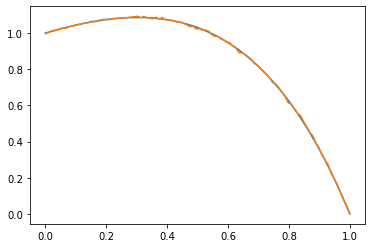

In [13]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import sympy as sp
from sympy import symbols, Function, Eq, exp, Min, Max
import matplotlib.pyplot as plt
from math import factorial
import requests
import itertools
from z3 import *
import random

def custom_game(jump):
    a = 0
    while a < jump:
        a += random.random()
    if a > 1:
        return 0
    else:
        a += 0.5
        return a

def custom_sim(jump, trials=10000):
    total = 0
    for i in range(trials):
        total += custom_game(jump)
    return total / trials

x, y = symbols("x y")
f = Function("f")

Eq1 = Eq(f(x), exp(x) * (1 - x) * (1 + x / 2))
Eq2 = sp.diff(Eq1.rhs).simplify()

solution = [(i, i.evalf()) for i in sp.solve(Eq(Eq2, 0)) if i > 0]

a = np.linspace(0.0001, 1, 100)
v_sim = np.vectorize(custom_sim)
v_func = np.vectorize(lambda x: exp(x) * (1 - x) * (1 + x / 2))

plt.plot(a, v_func(a))
plt.plot(a, v_sim(a))

p = Function("p")
f = Function("f")
g = Function("g")

x, y, u, v = symbols("x y u v", positive=True)

Eq1 = Eq(f(u), (Min(1, u) - Max(x, u - 1)) / (1 - x))
Eq2 = Eq(g(v), (Min(1, v) - Max(y, v - 1)) / (1 - y))
Eq3 = Eq(p(x, y),
         (exp(x) * (1 - x) * (1 - exp(y) * (1 - y)) +
          sp.integrate(f(u) * g(v), (v, y, u), (u, Max(x, y), 2)) *
          exp(x) * (1 - x) * exp(y) * (1 - y)) / (1 - (1 - exp(x) * (1 - x)) * (1 - exp(y) * (1 - y)))
         )

display(Eq3.subs(Eq1.lhs, Eq1.rhs).subs(Eq2.lhs, Eq2.rhs))

Eq4 = Eq(p(x, y), sp.Piecewise(
    (
        (exp(x) * (x - 1) * (
                    exp(y) * (-x ** 3 + x ** 2 - 3 * (x - 1) * y ** 2 + 2 * (x - 1) ** 2 * y + 4 * x + 2 * y ** 3 - 6) + 12)) /
        ((12 * (exp(x) * (x - 1) + exp(y) * ((y - 1)) * (exp(x) * (x - 1) + 1)))),
        x >= y),
        (
            (exp(x) * (
                        (exp(y) * (y - 1) * (
                                    -2 * x ** 3 + 3 * x ** 2 * (y - 1) - 2 * x * ((y - 2) * y - 5) + (
                                        y - 3) * (y * (y + 2) + 2))) + 12 * (x - 1))) /
            (12 * ((exp(x) * (x - 1) + 1) * exp(y) * (y - 1) + exp(x) * (x - 1))),
            x < y)
    ))
display(Eq4)

strategy = sp.nsolve([Eq4.rhs.diff(x), Eq4.rhs.diff(y)], [x, y], (0.5, 0.5))
bust_probability = lambda x: 1 - ((1 - x) * math.exp(x))

print("Solution is {:.9f}".format(bust_probability(strategy[0])))
